## Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score

## 1.) Reading input data 

In [2]:
rate_data = pd.read_csv('C:/Users/Sumit/Downloads/rate_data.csv')
rate_data.head()

,origin,destination,Month,rate
0,INMUN,BEANR,4,7355.56
1,INMUN,DEBRV,4,7355.56
2,INMUN,FRIRK,4,7355.56
3,INMUN,DEHAM,4,7355.56
4,INMUN,FRLEH,4,7355.56


## 2.) Counting NA values in destination column and dropping them

In [3]:
na_count = rate_data['destination'].isna().sum()
print("Count of NA values in 'destination':", na_count)
print("Dropping NULL values")
rate_data.dropna(inplace=True)
rate_data.info()

Count of NA values in 'destination': 409
Dropping NULL values
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57147 entries, 0 to 57555
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   origin       57147 non-null  object 
 1   destination  57147 non-null  object 
 2   Month        57147 non-null  int64  
 3   rate         57147 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


## 3.) Calculating correlation between variables


          Month      rate
Month  1.000000  0.388552
rate   0.388552  1.000000


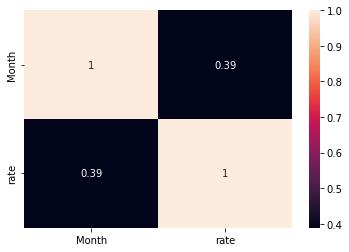

In [4]:
print(rate_data.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(rate_data.corr(), annot=True)
  
# displaying heatmap
plt.show()

## 4.) Plotting scatter graph to view outliers

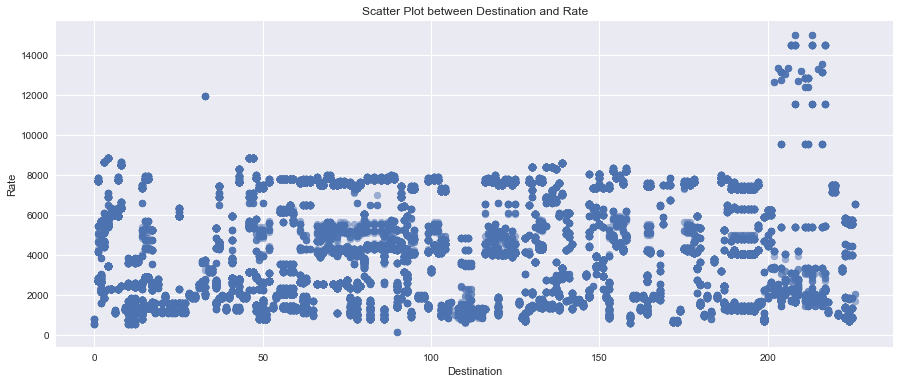

In [5]:
lbl = preprocessing.LabelEncoder()
plt.style.use('seaborn')
rate_data['destination'] = lbl.fit_transform(rate_data['destination'].astype(str))
y = rate_data['rate']

# Plot scatter graph
plt.figure(figsize=(15, 6))
plt.scatter(rate_data['destination'], rate_data['rate'], alpha=0.5)
plt.title('Scatter Plot between Destination and Rate')
plt.xlabel('Destination')
plt.ylabel('Rate')
plt.show()

## 5.) Replacing outliers with mean value

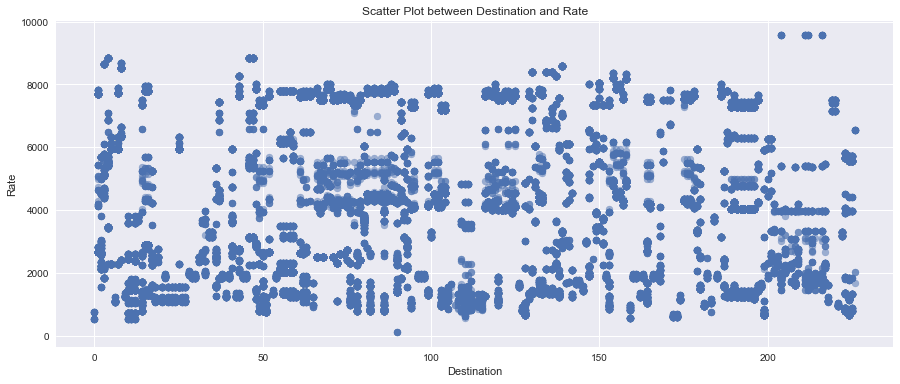

In [6]:

# Find indices of rows with rate < 10000
outlier_indices = rate_data[rate_data['rate'] > 10000].index

mean_value = rate_data['rate'].mean()
# Replace outliers with the mean value
rate_data.loc[outlier_indices, 'rate'] = mean_value

# Plot scatter graph
plt.figure(figsize=(15, 6))
plt.scatter(rate_data['destination'], rate_data['rate'], alpha=0.5)
plt.title('Scatter Plot between Destination and Rate')
plt.xlabel('Destination')
plt.ylabel('Rate')
plt.show()

## 6.) Label encoding categorical variables origin and destination


In [7]:
rate_data['origin'] = lbl.fit_transform(rate_data['origin'].astype(str))
rate_data['destination'] = lbl.fit_transform(rate_data['destination'].astype(str))

rate_data.head()

,origin,destination,Month,rate
0,16,46,4,7355.56
1,16,171,4,7355.56
2,16,202,4,7355.56
3,16,173,4,7355.56
4,16,203,4,7355.56


# Implementing Xgboost

In [8]:
# Shuffle data

rate_data = rate_data.sample(frac=1)

X, y = rate_data.iloc[:, :-1], rate_data.iloc[:, -1]
  
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.2, random_state = 123)
  
# Instantiation
xgb_r = xg.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.07, max_depth= 8, min_child_weight= 4, n_estimators= 1500, nthread= 4, objective= 'reg:squarederror', subsample= 0.7, seed = 123)
  
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))



# Calculate R-squared
r2 = r2_score(test_y, pred)

print("R-squared:", r2)

RMSE :  1163.473852
R-squared: 0.7483607000262861


##  Grid Search to identify the best set of parameters


In [10]:
# from sklearn.model_selection import GridSearchCV


# xgb1 = xg.XGBRegressor()
# parameters = {'nthread':[4], 
#               'objective':['reg:squarederror'],
#               'learning_rate': [.03, 0.05, .07],
#               'max_depth': [5, 6, 7,8],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [1000,1200,1500]}

# xgb_grid = GridSearchCV(xgb1,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(train_X,
#          train_y)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)